# Object Detection 

* Binary Segmentation - means if pixel value > k then make it 1 otherwise 0 

* Simple Thresholding <br>
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

cv2.THRESH_BINARY<br>
cv2.THRESH_BINARY_INV<br>
cv2.THRESH_TRUNC<br>
cv2.THRESH_TOZERO<br>
cv2.THRESH_TOZERO_INV


In [150]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import random

In [49]:
# Reading image in black white format , indicated by 0 as second argument
bw=cv2.imread('D:/Pooja/Online Courses Content/Lynda/opencv/Ch1/Frog.jpg',0)

In [50]:
height,width = bw.shape[0:2]

In [53]:
cv2.imshow('Original', bw)
binary=np.zeros([height,width,1],'uint8')
thresh=150
for row in range(0,height):
    for col in range(0,width):
        if bw[row][col]>thresh:
            binary[row][col]=255
cv2.imshow("slow binary",binary)
cv2.moveWindow('slow binary',0,height)


# other way to do same thing done above 
ret,thresh= cv2.threshold(bw,thresh,255,cv2.THRESH_BINARY)
cv2.imshow("CV threshold",thresh)
cv2.moveWindow('CV threshold',0,2*height)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

* Adaptive Thresholding  - Sometimes due to bad lighting or uneven lighting in picture - simple thresholding may not be enough- looks into local neighborhood of the image to determine whtehr a relative threshold is met 

In [59]:
img= cv2.imread("D:/Pooja/Online Courses Content/Lynda/opencv/Ch 3/ada_threshold.jpg",0)
height,width = img.shape[0:2]

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

Adaptive Method - It decides how thresholding value is calculated.
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

Block Size - It decides the size of neighbourhood area.

C - It is just a constant which is subtracted from the mean or weighted mean calculated.

In [60]:
cv2.imshow('Original', img)

ret,thresh= cv2.threshold(img,70,255,cv2.THRESH_BINARY)
cv2.imshow('Basic Binary',thresh)
cv2.moveWindow('Basic Binary',0,height)

thresh_adapt=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
cv2.imshow('Adaptive',thresh_adapt)
cv2.moveWindow('Adaptive',0,2*height)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

# Simple skin detection using HSV filters 

In [61]:
img2=cv2.imread("D:/Pooja/Online Courses Content/Lynda/opencv/Ch 3/img2.jpg")

In [63]:
hsv=cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)

splitting image into hsv channels and using combination of saturation and hue channels followed by using simple thresholding on these and combining outputs to detect faces.

In [82]:
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]
hsv_split=np.concatenate((h,s,v),axis=1)
cv2.imshow("Split HSV",hsv_split)

ret,min_sat=cv2.threshold(s,60,255,cv2.THRESH_BINARY)
cv2.imshow("Saturation Filter",min_sat)

ret,max_hue=cv2.threshold(h,25,255,cv2.THRESH_BINARY_INV)
cv2.imshow("Hue Filter",max_hue)

final=cv2.bitwise_and(min_sat,max_hue)
cv2.imshow('Final',final)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Contours 

take binary image and create tightly fitted closed perimeter around all individual objects in the scene. Each perimeter is called contour. it is also called iterative energy reduction algo, basically it creates boundary around all the objects.

these make use of idea of neighbourhoods and connectedness.It moves from the step of object segmentation ,often done by thresholding into the step of object detection.

In [83]:
img3= cv2.imread("D:/Pooja/Online Courses Content/Lynda/opencv/Ch 3/img3.jpg",1)

* Contour Object Detection

 three arguments in cv2.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs the contours and hierarchy. Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object. <br>
 
 If you pass cv.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory. <br>
 
 To draw the contours, cv.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

In [87]:
#using adaptive thresholding 
gray = cv2.cvtColor(img3 , cv2.COLOR_RGB2GRAY)
thresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)
cv2.imshow('Binary',thresh)

# getting contours 
_,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img4=img3.copy()

index=-1   # signifies all contours 
thickness=1
color=(0,0,255)

cv2.drawContours(img4,contours,index,color,thickness)
cv2.imshow('Contours',img4)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

* Area , perimeter , Center  and curvature 

In [95]:
objects = np.zeros([img3.shape[0],img3.shape[1],3],'uint8')
for c in contours:
    cv2.drawContours(objects,[c],-1,(255,0,0),-1)
    area=cv2.contourArea(c)
    perimeter=cv2.arcLength(c,True)
    
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
    # set values as what you need in the situation
        cx, cy = 0, 0
    
    cv2.circle(objects,(cx,cy),4,(0,0,255),-1)
    
    print("Area:{}, perimeter:{}".format(area,perimeter))
cv2.imshow('Contours',objects)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)



Area:0.0, perimeter:2.0
Area:0.0, perimeter:2.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:2.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:19.5, perimeter:19.899494767189026
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:16.5, perimeter:29.55634891986847
Area:0.0, perimeter:0.0
Area:0.0, perimeter:2.0
Area:0.0, perimeter:2.8284270763397217
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:745.0, perimeter:216.30865561962128
Area:2.0, perimeter:5.656854152679443
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:1505.0, perimeter:267.2792180776596
Area:0.0, perimeter:2.0
Area:0.0, perimeter:2.8284270763397217
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:2.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Area:0.0, perimeter:0.0
Are

-1

* Canny Edge Detection <br>

 First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. <br>
 
 About minval ,maxval<br>
 Hysteresis Thresholding<br>
This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

In [96]:
hsv = cv2.cvtColor(img3,cv2.COLOR_BGR2HSV)

ret,thresh= cv2.threshold(hsv[:,:,0],25,255,cv2.THRESH_BINARY_INV)
cv2.imshow("Thresh",thresh)

edges=cv2.Canny(img3,100,70)
cv2.imshow("Canny",edges)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

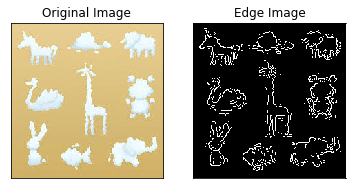

In [101]:

plt.subplot(121),plt.imshow(img3)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

* challenge object detection

draw objects on blank image , print perimeter and area 
only draw large objects (area greater than 1000 px2)
each object should be drawn with its on color 


In [117]:
img5=cv2.imread("D:/Pooja/Online Courses Content/Lynda/opencv/Ch 3/img4.jpg",1)

In [118]:
gray = cv2.cvtColor(img5 , cv2.COLOR_RGB2GRAY)
thresh=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,1)


In [119]:
_,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


In [152]:


objects1 = np.zeros([img5.shape[0],img5.shape[1],3],'uint8')
color1 = (list(np.random.choice(range(256), size=3)))  
color =[int(color1[0]), int(color1[1]), int(color1[2])]  
i=0
for c in contours:
    area=cv2.contourArea(c)
    perimeter=cv2.arcLength(c,True)
    
    print("Area:{}, perimeter:{}".format(area,perimeter))
    if((area>1000) & (area<2000)):
        
        cv2.drawContours(objects1,[c],-1,(random.randint(0,255),random.randint(0,255),random.randint(0,255)),-1)
       
        
cv2.imshow('Contours',objects1)
cv2.moveWindow('contour_ch',0,300)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)



Area:49776.5, perimeter:934.2426406145096
Area:79.0, perimeter:33.65685415267944
Area:1041.5, perimeter:149.29646337032318
0
Area:1264.5, perimeter:229.72286868095398
1
Area:2.0, perimeter:5.656854152679443
Area:1232.0, perimeter:142.1421353816986
2
Area:1783.0, perimeter:169.65685415267944
3
Area:2.0, perimeter:5.656854152679443
Area:1068.0, perimeter:122.22539603710175
4


-1

(Text(0.5, 1.0, 'object'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

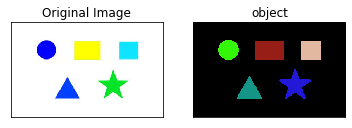

In [153]:
plt.subplot(121),plt.imshow(img5)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(objects1,cmap = 'gray')
plt.title('object'), plt.xticks([]), plt.yticks([])